In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
from IPython.display import Image
from PIL import Image

import ipywidgets as widgets
from IPython.display import display

# Load trained model

In [2]:
model = YOLO("runs/detect/train/weights/best.pt")

C:\Users\desmo\anaconda3\envs\yolo-microscopy\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


# Show training metrics

In [4]:
# specify path
log_path = "runs/detect/train/results.csv"

# Load as a pandas dataframe
df = pd.read_csv(log_path)

df.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,123.632,1.60555,2.38760,0.89675,0.14244,0.85452,0.74669,0.47563,1.11570,2.54623,0.82215,0.000517,0.000517,0.000517
1,2,248.122,1.15094,0.75557,0.82979,0.95103,0.94037,0.97761,0.67415,1.13257,0.73017,0.83014,0.001040,0.001040,0.001040
2,3,369.359,1.02811,0.63366,0.82314,0.94268,0.94103,0.97216,0.70345,0.97482,0.66280,0.81500,0.001552,0.001552,0.001552
3,4,492.423,1.03706,0.58936,0.81618,0.95884,0.95981,0.98032,0.75194,0.77973,0.58616,0.79088,0.001617,0.001617,0.001617
4,5,614.832,1.01809,0.57681,0.81886,0.96986,0.96570,0.98416,0.75665,0.85107,0.55563,0.79707,0.001601,0.001601,0.001601


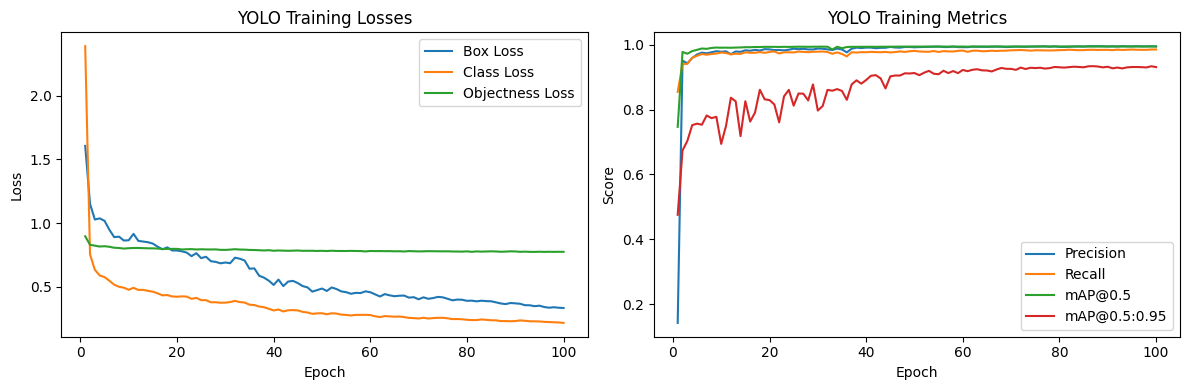

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(df['epoch'], df['train/box_loss'], label='Box Loss')
ax[0].plot(df['epoch'], df['train/cls_loss'], label='Class Loss')
ax[0].plot(df['epoch'], df['train/dfl_loss'], label='Objectness Loss')
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].set_title("YOLO Training Losses")
ax[0].legend()

ax[1].plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
ax[1].plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
ax[1].plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5')
ax[1].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Score")
ax[1].set_title("YOLO Training Metrics")
ax[1].legend()

plt.tight_layout()
plt.show()

(np.float64(-0.5), np.float64(2999.5), np.float64(2249.5), np.float64(-0.5))

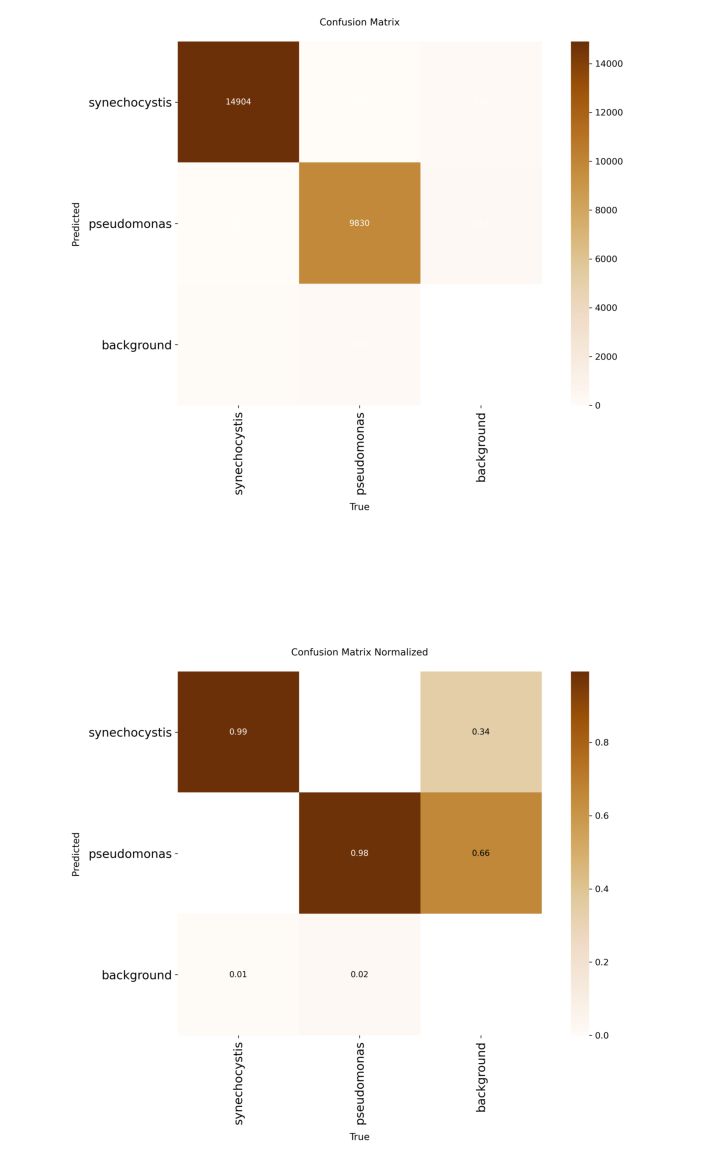

In [23]:
## Confusion matrix

confusion_matrix = cv2.imread('runs/detect/train/confusion_matrix.png')
confusion_matrix_normalised = cv2.imread('runs/detect/train/confusion_matrix_normalized.png')

fig, ax = plt.subplots(2, 1, figsize=(30, 15))
ax[0].imshow(confusion_matrix)
ax[0].axis('off')
ax[1].imshow(confusion_matrix_normalised)
ax[1].axis('off')

In [16]:
## Summary

# Select final epoch row
last_row = df.iloc[-1]

# Summary of metrics
summary = {
    'Epochs': len(df),
    'Final box loss': last_row.get('train/box_loss', None),
    'Final cls loss': last_row.get('train/cls_loss', None),
    'Final obj loss': last_row.get('train/obj_loss', None),
    'Precision (val)': last_row.get('metrics/precision(B)', None),
    'Recall (val)': last_row.get('metrics/recall(B)', None),
    'mAP@0.5': last_row.get('metrics/mAP_0.5(B)', None),
    'mAP@0.5:0.95': last_row.get('metrics/mAP_0.5:0.95(B)', None),
}

# Print summary
print("YOLO Training Summary:\n")
for k, v in summary.items():
    print(f"{k:<20}: {v:.4f}" if isinstance(v, float) else f"{k:<20}: {v}")

YOLO Training Summary:

Epochs              : 100
Final box loss      : 0.3342
Final cls loss      : 0.2175
Final obj loss      : None
Precision (val)     : 0.9947
Recall (val)        : 0.9852
mAP@0.5             : None
mAP@0.5:0.95        : None


# Show predictions

In [17]:
results = model.predict(source="test/images", save=True)


image 1/10 C:\Users\desmo\Desktop\code_for_github\YOLO_cyanobacteria_model\darkfield_mixed\test\images\test0.jpg: 512x512 5 synechocystiss, 5 pseudomonass, 88.3ms
image 2/10 C:\Users\desmo\Desktop\code_for_github\YOLO_cyanobacteria_model\darkfield_mixed\test\images\test1.jpg: 512x512 5 synechocystiss, 5 pseudomonass, 52.8ms
image 3/10 C:\Users\desmo\Desktop\code_for_github\YOLO_cyanobacteria_model\darkfield_mixed\test\images\test2.jpg: 512x512 3 synechocystiss, 7 pseudomonass, 55.5ms
image 4/10 C:\Users\desmo\Desktop\code_for_github\YOLO_cyanobacteria_model\darkfield_mixed\test\images\test3.jpg: 512x512 5 synechocystiss, 5 pseudomonass, 48.6ms
image 5/10 C:\Users\desmo\Desktop\code_for_github\YOLO_cyanobacteria_model\darkfield_mixed\test\images\test4.jpg: 512x512 3 synechocystiss, 7 pseudomonass, 54.4ms
image 6/10 C:\Users\desmo\Desktop\code_for_github\YOLO_cyanobacteria_model\darkfield_mixed\test\images\test5.jpg: 512x512 3 synechocystiss, 7 pseudomonass, 46.8ms
image 7/10 C:\Users\d

In [18]:
# Specify directory
predicted_images_dir = "runs/detect/predict"

# Get filenames
image_files = sorted([f for f in os.listdir(predicted_images_dir) if f.lower().endswith(('.jpg', '.png'))])

# Final paths
image_paths = {f: os.path.join(predicted_images_dir, f) for f in image_files}

def show_prediction(filename):
    img_path = image_paths[filename]
    img = Image.open(img_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title(filename)
    plt.axis("off")
    plt.show()

dropdown = widgets.Dropdown(options=image_files, value=image_files[0], description='Image:', layout=widgets.Layout(width='50%')
)

widgets.interact(show_prediction, filename=dropdown)

interactive(children=(Dropdown(description='Image:', layout=Layout(width='50%'), options=('test0.jpg', 'test1.…

<function __main__.show_prediction(filename)>